<img src="https://raw.githubusercontent.com/ml-unison/regresion-logistica/master/imagenes/ml-unison.png" width="250">

# Maquinas de vectores de soporte

**Julio Waissman Vianova**

En esta libreta vamos a ver las diferencias entre los diferentes *kernels* así como el efecto del parámetro $C$ en la clasificación por máquinas de vectores de soporte. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
plt.style.use('ggplot')
%matplotlib inline



### 1. Generación de las bases de datos con las que vamos a probar


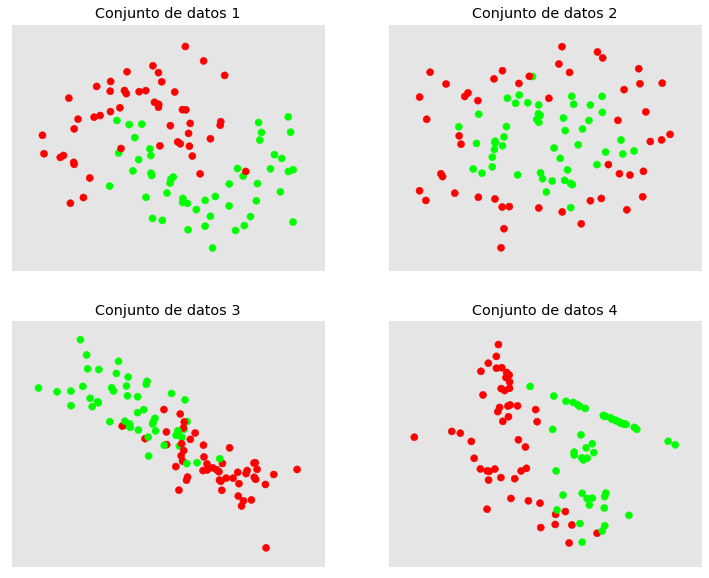

In [2]:
# Conjuntos de datos para probar
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Datos en forma de media luna
X1, y1 = datasets.make_moons(noise=0.3, random_state=0)

# Datos en forma de círculos
X2, y2 = datasets.make_circles(noise=0.2, factor=0.5, random_state=1)

# Datos en forma de regresion lineal
X3, y3 = datasets.make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
# Le agregamos ruido para hacerlos interesantes
rng = np.random.RandomState(2)
X3 += 2 * rng.uniform(size=X3.shape)

X4, y4 = datasets.make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2
)

# Los conjuntos de datos irdenados como una lista de pares ordenados
datasets = [(X1, y1), (X2, y2), (X3, y3), (X4, y4)]

# Y los grafiacamos para verlos
figure = plt.figure(figsize=(10, 10))
cm_escala = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

for (i, ds) in enumerate(datasets):

    # Selecciona los valores del conjunto de datos y los escala
    X, y = ds
    X = StandardScaler().fit_transform(X)

    # Grafica
    ax = plt.subplot(2, 2, i+1)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cm_escala)
    ax.set_xlim(X[:, 0].min() - .5, X[:, 0].max() + .5)
    ax.set_ylim(X[:, 1].min() - .5, X[:, 1].max() + .5)
    ax.set_xticks(())
    ax.set_yticks(())
    plt.title(f"Conjunto de datos {i+1}")
figure.subplots_adjust(left=.02, right=.98)    
plt.show()



### 2. Probando diferentes kernels en los conjuntos de datos





Base de datos 1


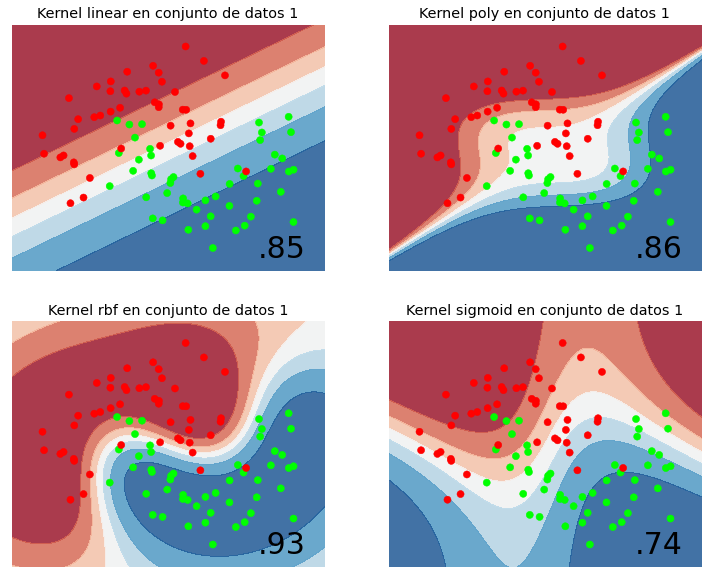



Base de datos 2


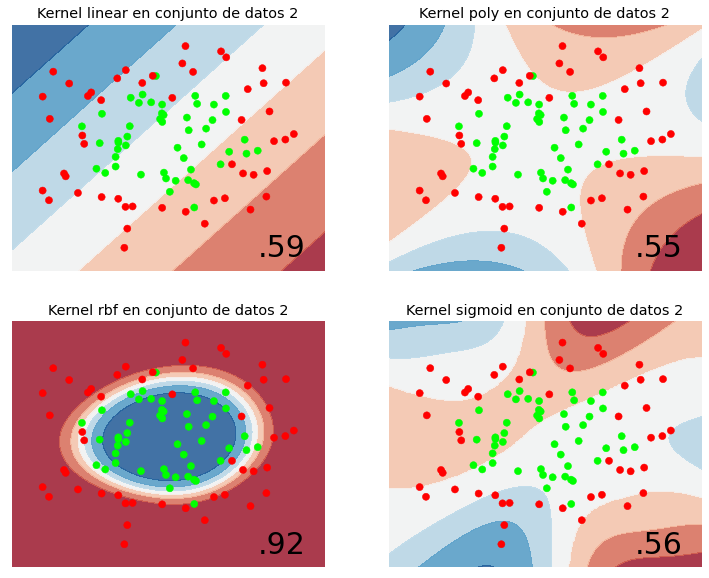



Base de datos 3


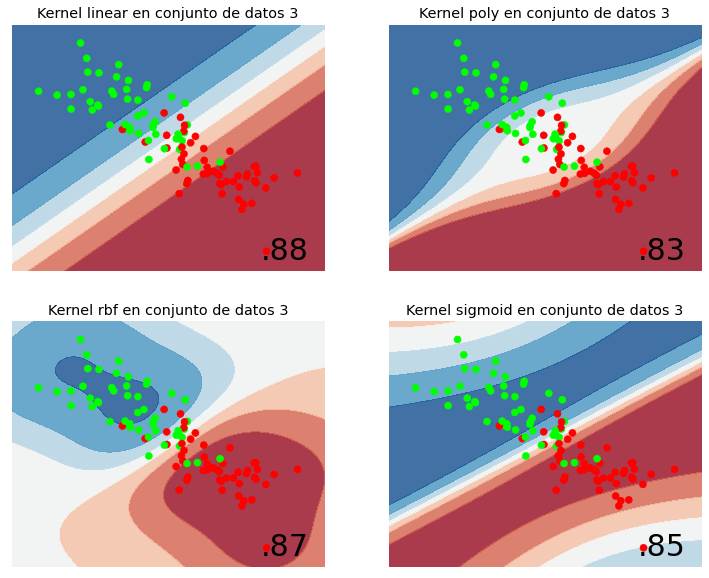



Base de datos 4


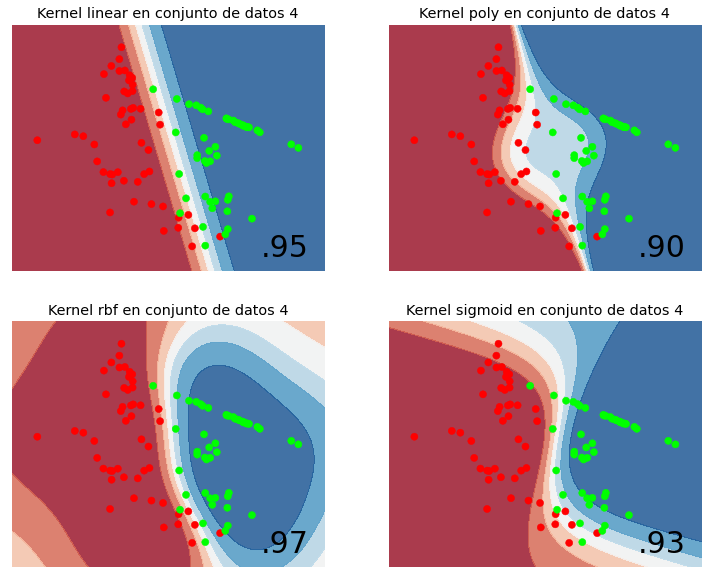

In [3]:
## Vamos a escoger una escala de colores de alto contraste
cm = plt.cm.RdBu

# Una figura por cada conjunto de datos
for (cual, ds) in enumerate(datasets):
    
    print(f"\n\nBase de datos {cual + 1}")
    figure = plt.figure(figsize=(10, 10))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
 
    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, kernel) in enumerate(['linear', 'poly', 'rbf', 'sigmoid']):
        ax = plt.subplot(2, 2, i + 1)

        # Entrenamiento
        clf = SVC(kernel=kernel, C=1, probability=True)
        clf.fit(X, y)
        score = clf.score(X, y)

        # Clasifica cada punto en el meshgrid
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un contorno de probabilidad
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Grafica los datos
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
        # Arregla axes y pone titulos
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')
        plt.title(f"Kernel {kernel} en conjunto de datos {cual + 1}")

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

### 3. Que pasa cuando aumenta $C$ en el clasificador lineal



Base de datos 1


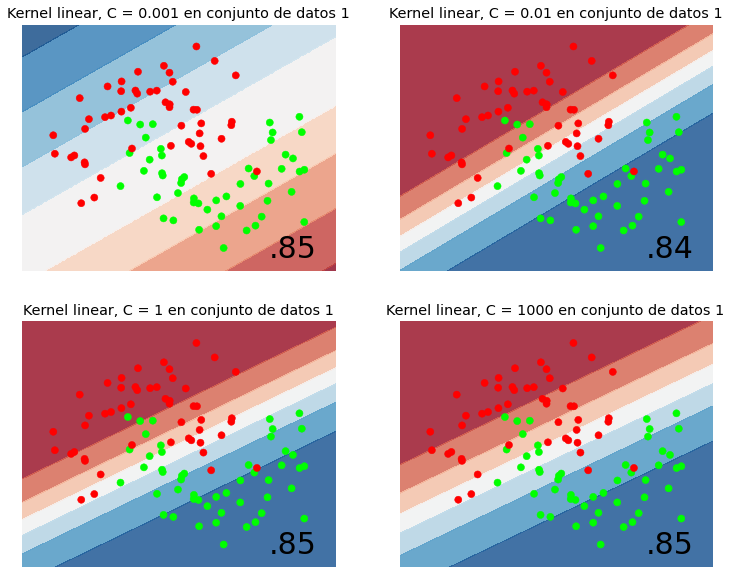



Base de datos 2


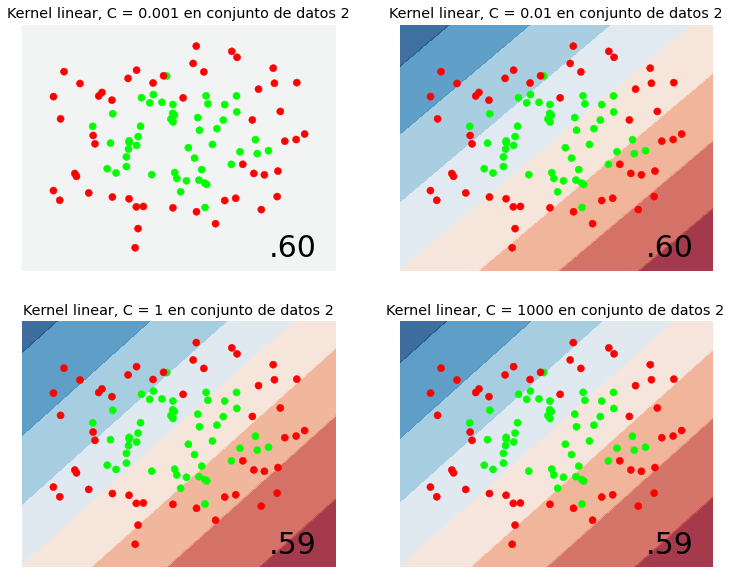



Base de datos 3


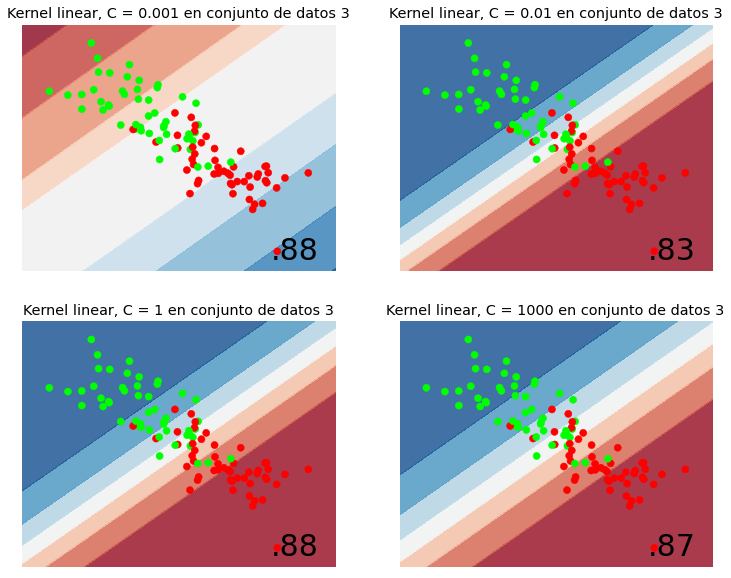



Base de datos 4


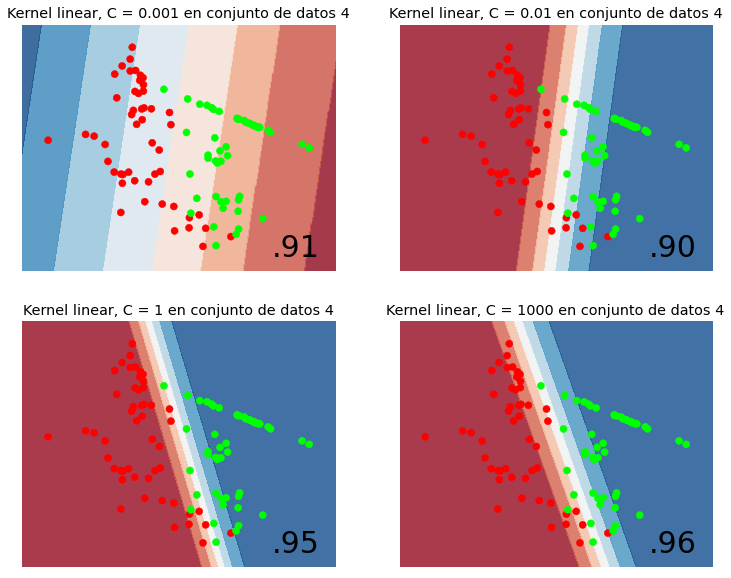

In [13]:
kernel = 'linear'

# Una figura por cada conjunto de datos
for (cual, ds) in enumerate(datasets):
    
    print(f"\n\nBase de datos {cual + 1}")
    figure = plt.figure(figsize=(10, 10))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
 
    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, C) in enumerate([.001, .01, 1, 1000]):
        ax = plt.subplot(2, 2, i + 1)

        # Entrenamiento
        clf = SVC(kernel=kernel, C=C, probability=True)
        clf.fit(X, y)
        score = clf.score(X, y)

        # Clasifica cada punto en el meshgrid
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un contorno de probabilidad
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Grafica los datos
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
        # Arregla axes y pone titulos
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')
        plt.title(f"Kernel {kernel}, C = {C} en conjunto de datos {cual + 1}")

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

**Ejercicio 1. Prueba modificar los valores de C para los diferentes kernels manteniendo el resto de los parámetros por default. Comenta aquí mismo tus conclusiones.**

Cuando utilizamos una C pequeña la partición de las dos clases se hace de una manera centrada, manteniendo una distancia grande entre las dos clases, es decir, deja espacio para intentar clasificar mejor nuevos datos. Esto ocasiona que se puedan tener misclasificaciones.
Cuando utilizamos una C grande, la partición ya no es centrada y no deja ese espacio entre las class, es hecha de forma que reduzca las misclasificaciones, para que una clase correctamente clasifique a todos sus verdaderos miembros.
Entre menor la C, estamos indicando que no nos importa tanto las misclasificaciones. Cuando la C es grande, indicamos que queremos reducir las misclasificaciones lo más posible.
Al comparar las gráficas de un valor bajo de la C contra uno alto, es fácil ver la diferencia que nos produce.

### 4. La variable `gamma` para los kernel `rbf`, `poly` y `sigmoid`

** Ejercicio 2. Escribe aquí mismo que significa la variable `gamma` ($\gamma$) ** para los diferentes kernels (puedes poner la ecuación si es necesario)

1. Para `rbf`: Para rbf la variable gamma se utiliza para indicar el inverso de la varianza de la función gaussiana, o dicho de otra forma, el inverso de la influencia de un ejemplo de entrenamiento. Por esto, una gamma baja nos indica alta varianza, entonces puntos separados pueden ser considerados similares. Una gamma alta nos indica baja varianza, entonces para que puntos sean considerados similares tienen que estar cerca.

2. Para `poly`: Nos define qué tan lejos llega la influencia de un ejemplo de entrenamiento. Un valor de gamma bajo significa que la influencia llega lejos, y un valor alto significa que la influencia llega cerca. Es decir, nuestro perímetro de decisión va a ser dependiente solamente de los ejemplos cercanos cuando tenemos una gamma alta, y cuando es baja, incluso los ejemplos lejanos tienen influencia.

3. Para `sigmoid`: Se usar para definir qué tan lejos llega la influencia de un ejemplo de entrenamiento. Un valor de gamma bajo significa que la influencia llega lejos, y un valor alto significa que la influencia llega cerca. Es decir, nuestro perímetro de decisión va a ser dependiente solamente de los ejemplos cercanos cuando tenemos una gamma alta, y cuando es baja, incluso los ejemplos lejanos tienen influencia.


In [39]:
#kernel = 'rbf'
#C = 10

def doClasiAndGraph(kernel, C):
# Una figura por cada conjunto de datos
    for (cual, ds) in enumerate(datasets):

        print(f"\n\nBase de datos {cual + 1}")
        figure = plt.figure(figsize=(10, 10))

        # Escalar y selecciona valores de entrenamiento y prueba
        X, y = ds
        X = StandardScaler().fit_transform(X)

        # Meshgrid para pintar las regiones
        xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                             np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

        # Por cada clasificador
        for (i, gamma) in enumerate([.01, .1, 1, 10]):
            ax = plt.subplot(2, 2, i + 1)

            # Entrenamiento
            clf = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
            clf.fit(X, y)
            score = clf.score(X, y)

            # Clasifica cada punto en el meshgrid
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)

            # Asigna un contorno de probabilidad
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            # Grafica los datos
            ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
            # Arregla axes y pone titulos
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=30, horizontalalignment='right')
            plt.title(f"{kernel}, C = {C}, $\gamma$={gamma} en conjunto de datos {cual + 1}")

        figure.subplots_adjust(left=.02, right=.98)
        plt.show()



Base de datos 1


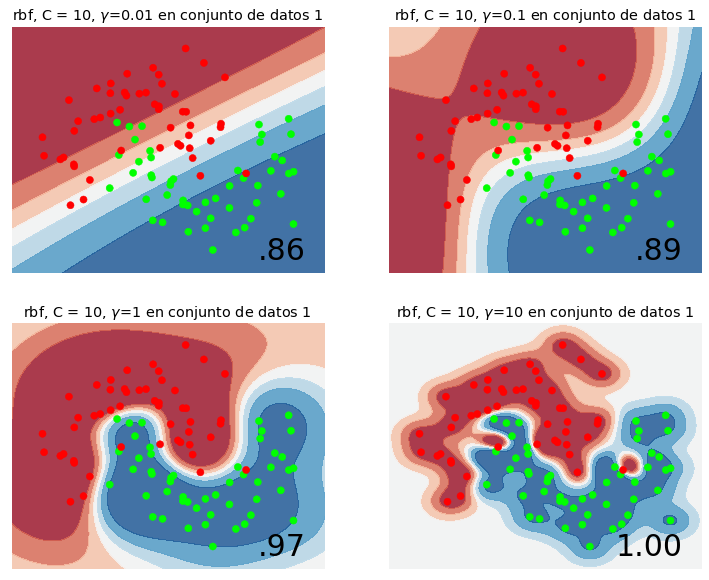



Base de datos 2


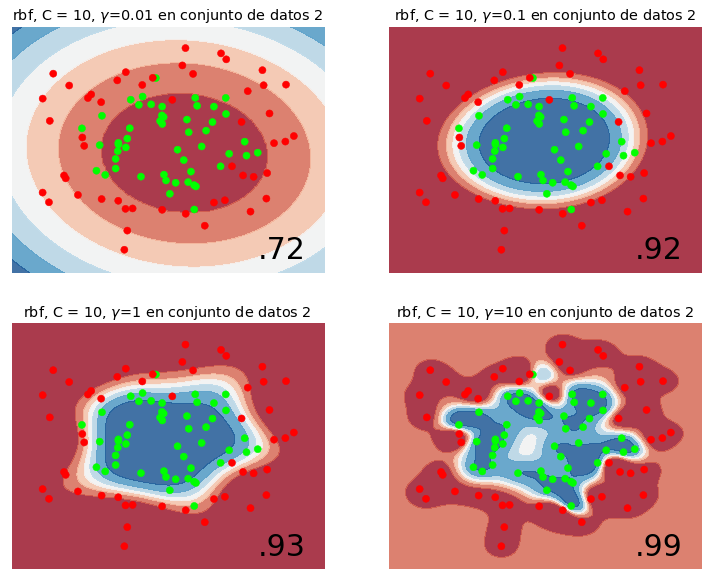



Base de datos 3


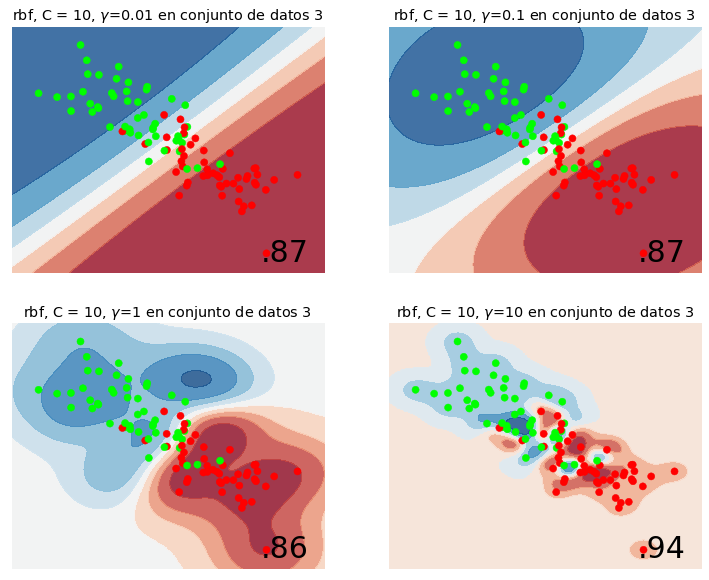



Base de datos 4


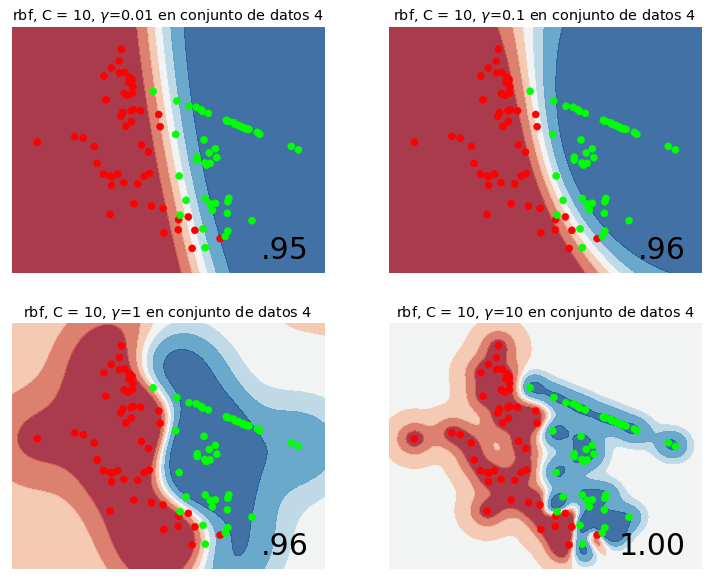

In [41]:
doClasiAndGraph('rbf',10)



Base de datos 1


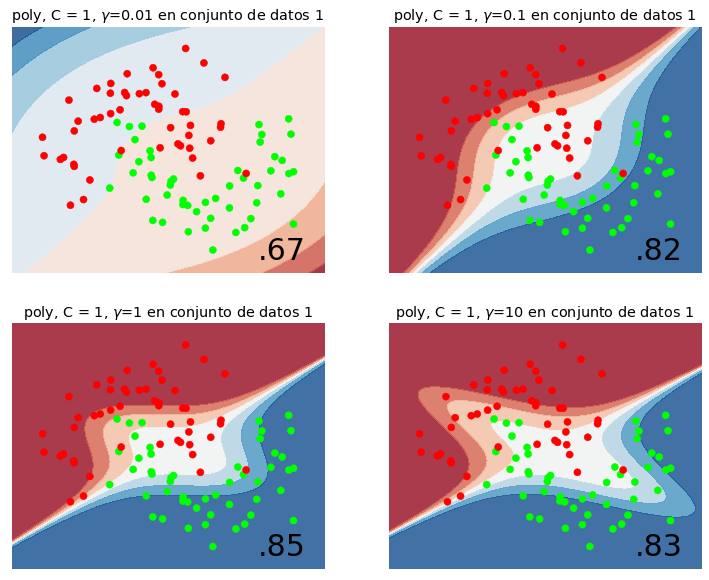



Base de datos 2


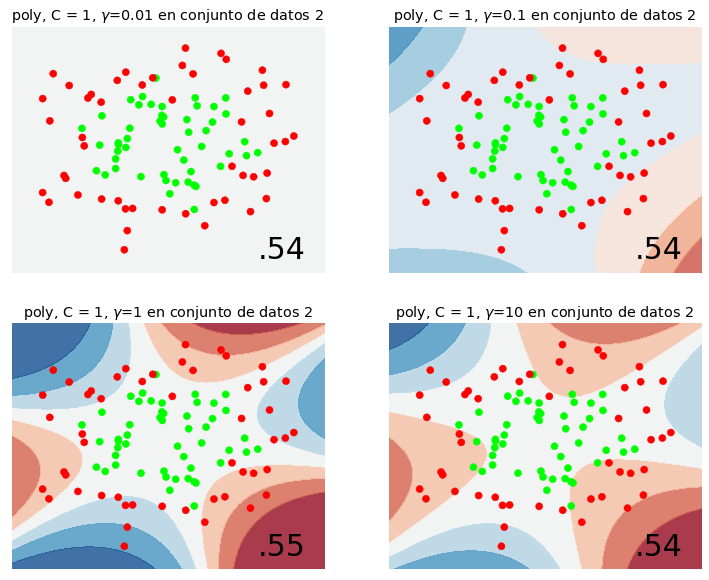



Base de datos 3


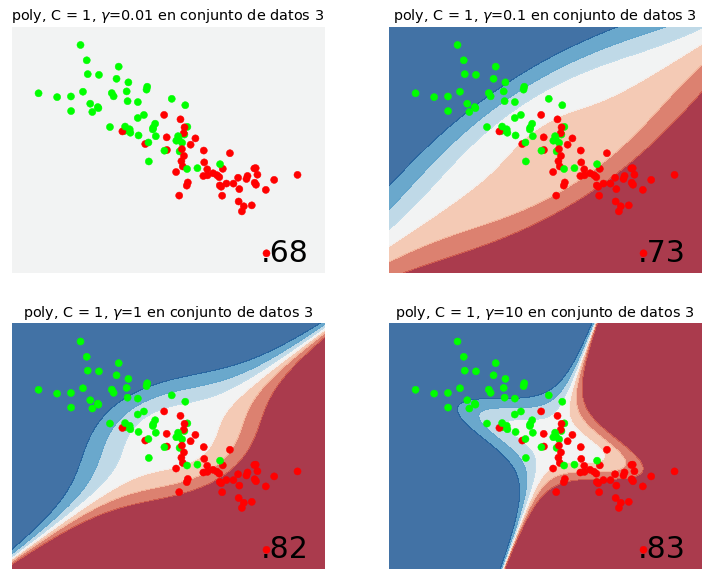



Base de datos 4


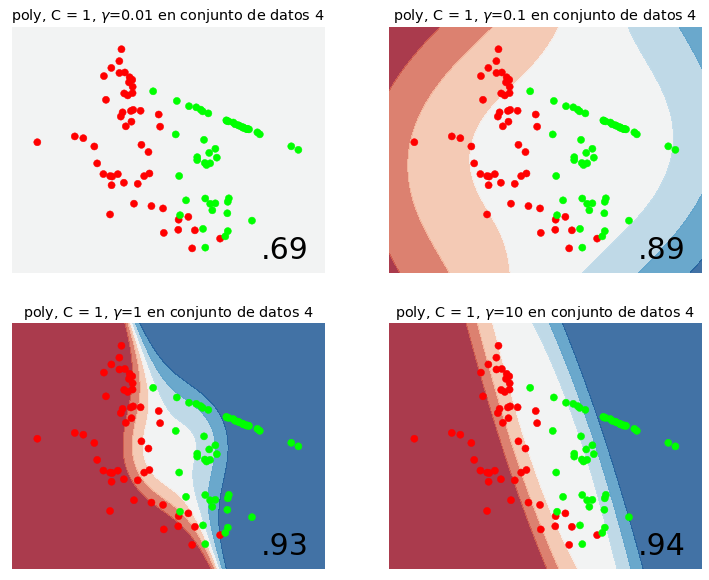

In [44]:
doClasiAndGraph('poly',1)



Base de datos 1


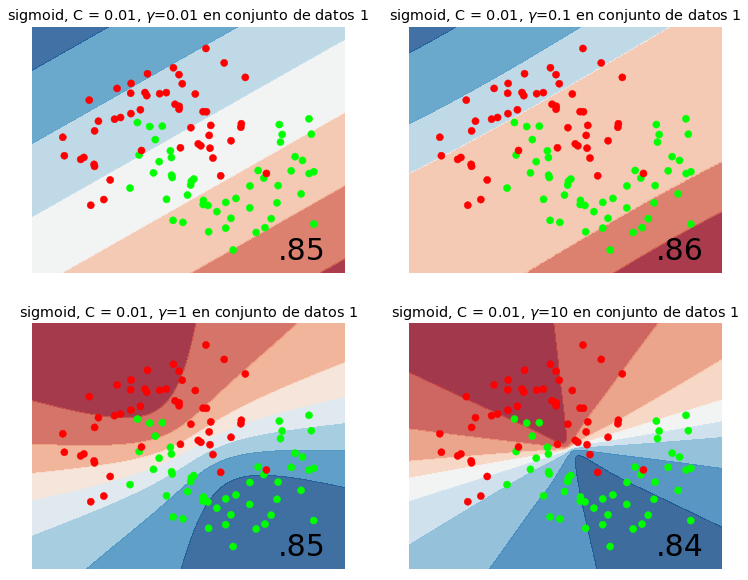



Base de datos 2


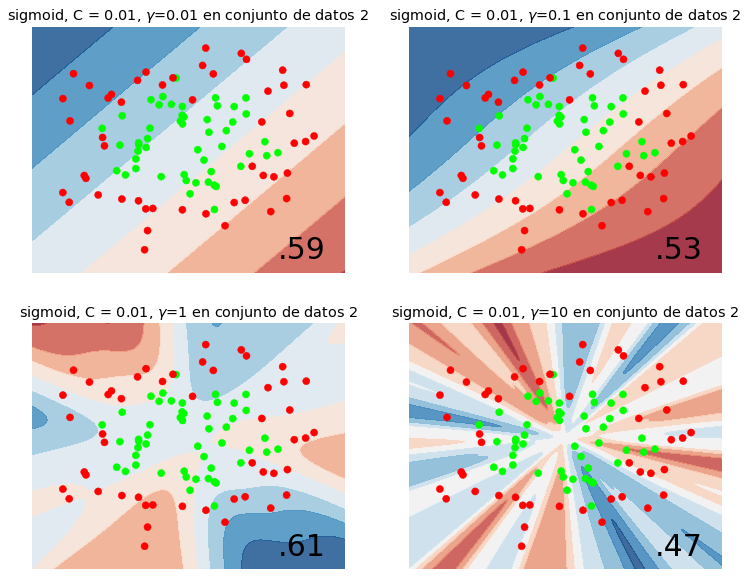



Base de datos 3


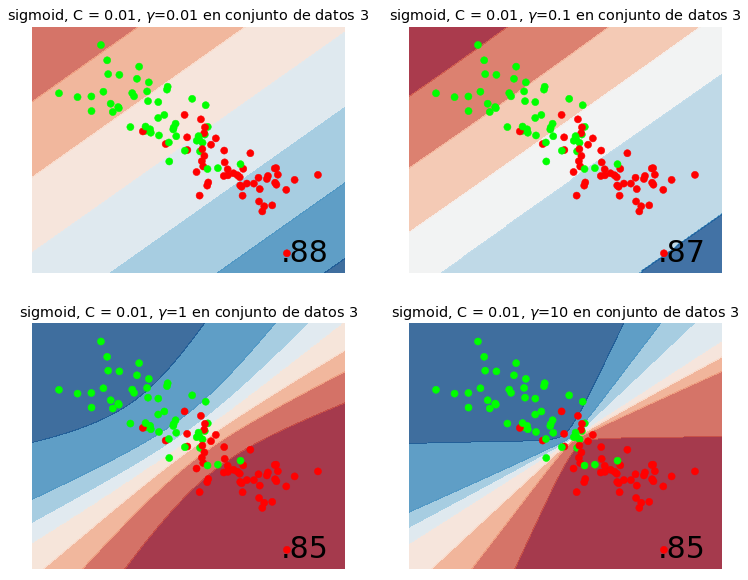



Base de datos 4


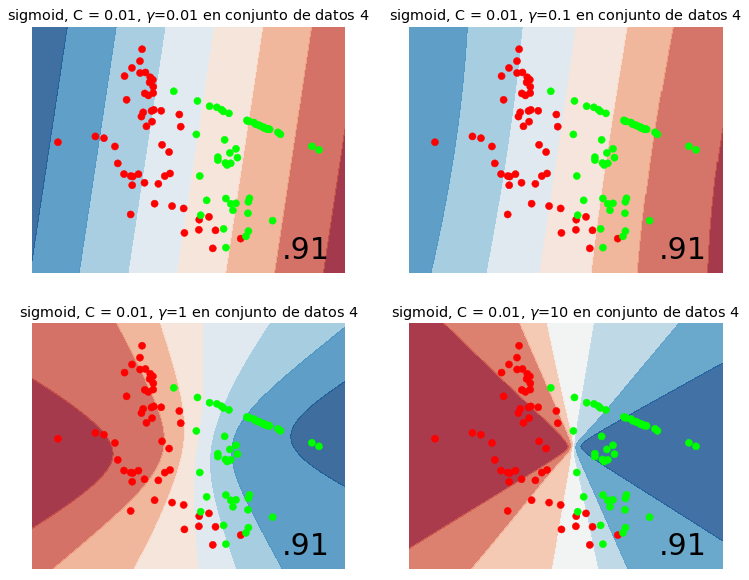

In [51]:
doClasiAndGraph('sigmoid',0.01)

**Ejercicio 3: Encuentra la mejor combiación de $C$ y $\gamma$ para los 3 tipos de *kernel*, explica en cada uno en que afecta la $\gamma$ y porque tiene una influencia tan diferente.**

-RBF: La mejor combinación encontrada fue con C = 10 y Gamma = 1. Para esta se ve la afectación de la gamma en como la frontera de la clasificación entre las clases se pega mucho a los puntos entre más grande, y se ve el overfitting. Entre menor la gamma, la forma de la frontera de la clasificación no se ve afectada tanto por los puntos cercanos, y por lo tanto es más suave.

-Poly: La mejor combinación encontrada fue con C = 1 y Gamma = 1. Entre mayor la gamma se ve el apego de las curvatura producida por la polinomial a los puntos que se encuentran en la frontera. Entre menor la gamma, la curvatura se abre mucho, tendiendo a ser recta.

-Sigmoid: La mejor combinación encontrada fue con C = 0.01 y Gamma = 1. Al incrementar la gamma a valores altos, la influencia de los puntos cercanos ocasiona que se crean límites con curvaturas en forma de picos. Al decrementar la gamma, esa curvatura tipo pico se va suavizando y abriendo, hasta en valores muy bajos abrir tanto y llegar a ser recta.

La influencia tan diferente que se observa en la afectación de cada kernel es debido al propio método y límitantes en el que cada uno está basado. Al utilizar el kernel rbf es donde la variación de gamma muestra de forma más clara lo que hace, pues como va cambiando la forma del contorno de la frontera de las clases y tiene la libertad de tomar la forma que sea, mientras que la polinomial y sigmoid se tratan de adaptar con sus curvas suaves o muy agudas.

**Ejercicio 4: Como viste, existe mucho código repetido en los incisos 2, 3 y 4, por lo que se puede generalizar una parte con una función. Intenta generalizarlo**

-Se generalizó y se puso en la función definida como doClasiAndGraph(kernel, C)
Se utilizó para llamar la función para los diferentes kernels en las celdas pasadas.

**Exta bono: ¿Que significa el parámetro `coef0` para los *kernels* `sigmoid` y `poly`? ¿Cómo afeca en la clasificación?**

-El parámetro coef0 se utiliza para la proyección del kernel. Este parámetro afecta en qué tanto el modelo es influenciado por polinomios de alto nivel